In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

In [6]:
# 레이블인 sentiment가 있는 학습데이터
train = pd.read_csv('data/labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('data/testData.tsv', header = 0, delimiter = '\t', quoting = 3)

print(train.shape)

(25000, 3)


In [7]:
print(test.shape)

(25000, 2)


In [8]:
print(test.head(10))

           id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...
5    "2913_8"  "...as valuable as King Tut's tomb! (OK, maybe...
6    "4396_1"  "This has to be one of the biggest misfires ev...
7     "395_2"  "This is one of those movies I watched, and wo...
8   "10616_1"  "The worst movie i've seen in years (and i've ...
9    "9074_9"  "Five medical students (Kevin Bacon, David Lab...


In [9]:
print(train.info)

<bound method DataFrame.info of               id  sentiment                                             review
0       "5814_8"          1  "With all this stuff going down at the moment ...
1       "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2       "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3       "3630_4"          0  "It must be assumed that those who praised thi...
4       "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
5       "8196_8"          1  "I dont know why people think this is such a b...
6       "7166_2"          0  "This movie could have been very good, but com...
7      "10633_1"          0  "I watched this video at a friend's house. I'm...
8        "319_1"          0  "A friend of mine bought this film for £1, and...
9      "8713_10"          1  "<br /><br />This movie is full of references....
10      "2486_3"          0  "What happens when an army of wetbacks, towelh...
11     "6811_10"    

In [10]:
print(train.describe)

<bound method NDFrame.describe of               id  sentiment                                             review
0       "5814_8"          1  "With all this stuff going down at the moment ...
1       "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2       "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3       "3630_4"          0  "It must be assumed that those who praised thi...
4       "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
5       "8196_8"          1  "I dont know why people think this is such a b...
6       "7166_2"          0  "This movie could have been very good, but com...
7      "10633_1"          0  "I watched this video at a friend's house. I'm...
8        "319_1"          0  "A friend of mine bought this film for £1, and...
9      "8713_10"          1  "<br /><br />This movie is full of references....
10      "2486_3"          0  "What happens when an army of wetbacks, towelh...
11     "6811_10"  

In [11]:
#html 태그가 섞여있기 때문에 이를 정제해줄 필요가 있음
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [12]:
# BueatifulSoup을 통해서 train 데이터의 리뷰 칼럼의 html태그를 전부 삭제한다.
example1 = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [13]:
# 정규표현식(re)을 통해서 특수문자 제거
# 소문자와 대문자가 아닌 것은 공백으로 처리한다.
letters_only = re.sub('[^a-zA-Z]',' ',example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [14]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]
# 437개로 쪼개짐, 그 중 위에서부터 10개

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

불용어 제거(Stopword Removal)
일반적으로 코퍼스에서 자주 나타나는 단어는 학습모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른텍스트와 구별하지 못한다. 예를 들어 조사, 접미사, i, me, my, it, this that, is are 등과 같은 단어는 빈번하게 등장하지만, 실제 의미를 찾는데 크게 기여하지 않는다. Stopword는 "to" 또는 "the"와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다. NLTK에는 153개의 붕ㄹ용어가 미리 정의되어 있다. 17개의 언어에 대해 정의되어 있으며 한국어는 없다.

In [15]:
# 영어(english의 불용어들)
stopwords.words('english')[:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
words[:10]

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [17]:
#불용어구가 빠진 words
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
print(words[:10])

219
['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary']


In [18]:
# 스노우볼스테머
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]

words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [19]:
# Lemmatization 음소표기법
# 앞 뒤 문맥을 보고 단어의 의미를 식별한다.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('files'))
words = [wordnet_lemmatizer.lemmatize(w) for w in words]
#처리 후 단어
print(words[:10])

fly
file
['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari']


★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

In [23]:
def review_to_words(raw_review):
    #1. HTML 제거(Beautiful Soup)
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    #2. 영문자가 아닌 문자는 공백으로 전환(re-정규식표현.sub)
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    #3. 소문자 변환
    words = letters_only.lower().split()
    #4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    #5. Stopwords 불용어제거
    meaningful_words = [w for w in words if not w in stops]
    #6. 어간추출(stemming)
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    #7. 공백으로 구분된 문자열로 결합하여 결과를 반화
    return(' '.join(stemming_words))


clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

In [24]:
num_reviews = train['review'].size
num_reviews

25000

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)
def apply_by_multiprocessing(df, func, **kwags):
    #키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    #위에서 가져온 workers 파라메터를 꺼냄
    pool = Pool(processes = workers)
    #실행할 함수와 데이터 프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

%time clean_train_reviews = apply_by_multiprocessing(\
                                                    train['review'], review_to_words, workers=4)

In [41]:
clean_train_reviews =[]

for i in range(0, num_reviews):
    if(i+1)%5000 == 0 :
        print('Review{} of {}'.format(i+1, num_reviews))
    
    clean_train_reviews.append(review_to_words(train['review'][i]))
    

Review5000 of 25000
Review10000 of 25000
Review15000 of 25000
Review20000 of 25000
Review25000 of 25000


In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

In [43]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

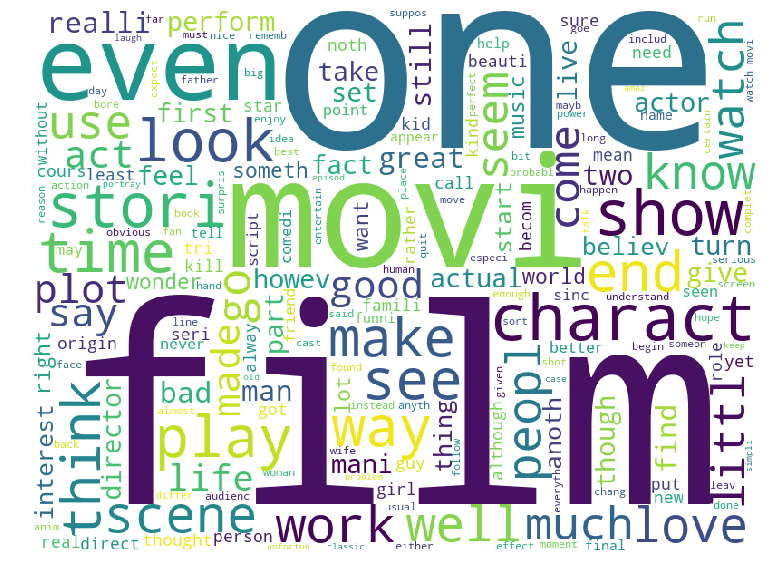

Wall time: 15.1 s


In [44]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_train_reviews))

In [47]:
# 단어 수
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

AttributeError: 'list' object has no attribute 'apply'